In [1]:
import fairlib, yaml, os

%matplotlib inline
from fairlib import analysis
import altair as alt
from vega_datasets import data
from pathlib import Path
import pandas as pd
import torch

from torchvision.models import resnet18, ResNet18_Weights
from myanalysis.utils import *
from fairlib.src import analysis
#expi_id should be the adv etc
exp_id = "dadv"
project_dir="dev"


dataset="bffhq"
dataset= "Bios_gender"


results_dir="./results"
checkpoint_dir="results"
checkpoint_name="checkpoint_epoch"
epoch="11.00"
opts_file=Path('/home/user/fairlibcode/example_conf_file/'+dataset+"_"+exp_id+'.yaml')
print (opts_file)
Shared_options={}
GAP_metric_name=  "TPR_GAP"
Performance_metric_name = "accuracy"
selection_criterion="DTO"
if os.path.exists (opts_file) :
    Shared_options = yaml.safe_load(opts_file.read_text())
    print(Shared_options)
else:
    print ("Cant find shared opts file")
if 1:
    if "project_dir" in Shared_options.keys():
        project_dir=Shared_options['project_dir']
    if "results_dir" in Shared_options.keys():
        results_dir=Shared_options['results_dir']
    if "checkpoint_dir" in  Shared_options.keys():
        checkpoint_dir=Shared_options['checkpoint_dir']
    else:
        Shared_options['checkpoint_dir'] = checkpoint_dir
    if "checkpoint_name" in  Shared_options.keys():
        checkpoint_name=Shared_options['checkpoint_name']
    else:
        Shared_options['checkpoint_name'] = checkpoint_name
    if "GAP_metric_name" in  Shared_options.keys():
        GAP_metric_name=Shared_options['GAP_metric_name']
    else:
        Shared_options['GAP_metric_name'] = GAP_metric_name
    if "Performance_metric_name" in  Shared_options.keys():
        Performance_metric_name=Shared_options['Performance_metric_name']
    else:
        Shared_options['Performance_metric_name'] = Performance_metric_name
    if "selection_criterion" in  Shared_options.keys():
        selection_criterion=Shared_options['selection_criterion']
    else:
        Shared_options['selection_criterion'] = selection_criterion

/home/user/fairlibcode/example_conf_file/Bios_gender_dadv.yaml
{'ARL': False, 'ARL_n': 1, 'BT': None, 'BTObj': None, 'DyBT': None, 'DyBTObj': None, 'DyBTalpha': 0.1, 'DyBTinit': 'original', 'FCL': False, 'FCLObj': 'g', 'GBT': False, 'GBTObj': None, 'GBT_N': None, 'GBT_alpha': 1, 'INLP': False, 'INLP_by_class': False, 'INLP_discriminator_reweighting': None, 'INLP_min_acc': 0.0, 'INLP_n': 300, 'activation_function': 'Tanh', 'adv_BT': None, 'adv_BTObj': None, 'adv_activation_function': 'ReLu', 'adv_batch_norm': False, 'adv_batch_size': 512, 'adv_checkpoint_interval': 1, 'adv_corr_loss': False, 'adv_debiasing': True, 'adv_decoupling': False, 'adv_decoupling_labelled_proportion': 1.0, 'adv_diverse_lambda': 1, 'adv_dropout': 0.4, 'adv_epochs': 100, 'adv_epochs_since_improvement': 5, 'adv_gated': False, 'adv_gated_mapping': None, 'adv_gated_type': 'Augmentation', 'adv_hidden_size': 256, 'adv_lambda': 0.8, 'adv_level': 'last_hidden', 'adv_lr': 0.001, 'adv_n_hidden': 2, 'adv_num_subDiscriminato

In [12]:
get_best_result

<function myanalysis.utils.get_best_result(df, restriction=False, assume_match_if_no_index=True, selection_criterion='dev_DTO')>

In [6]:

results_dict = analysis.retrive_results("adult", log_dir="./results/")
print (results_dict.keys())
adult_vanilla = results_dict['alysis/adult_vanilla']

#bffhq_dadv = results_dict['alysis/bffhq_dadv']
#print_results(bffhq_dadv, "bffhq_dadv", True)
adult_bteo = results_dict['alysis/adult_BTEO']
adult_dadv = results_dict['alysis/adult_dadv']
adult_inlp = results_dict['alysis/adult_inlp']



print_results_p(adult_vanilla, "Adult \\Vanilla", True)
print_results_p(adult_bteo, "Adult BTEO", True)
print_results_p(adult_dadv, "Adult DAdv", True)
print_results_p(adult_inlp, "Adult INLP", True, INLP=True)
#print_results_p(adult_inlp, "Adult INLP (incorect)", True, INLP=False)

results_dict_adult = {"Adult \\Vanilla":  adult_vanilla, "Adult \\BTEO" :adult_bteo, 
                      "Adult \\DAdv": adult_dadv, "Adult \\INLP": adult_inlp
                     }
results_dict = analysis.retrive_results("COMPAS_race", log_dir="./results/")


compas_vanilla = results_dict['/COMPAS_race_vanilla']
compas_bteo = results_dict['/COMPAS_race_BTEO']
compas_dadv = results_dict['/COMPAS_race_dadv']
compas_inlp = results_dict['/COMPAS_race_inlp']
#compas_inlp_step = results_dict['/COMPAS_race_inlpstep']
#compas_inlp_scheddef = results_dict['/COMPAS_race_inlpscheddef']


print_results_p(compas_vanilla, "COMPAS \\Vanilla", True, True)
print_results_p(compas_bteo, "COMPAS \\BT", True, False)
print_results_p(compas_dadv, "COMPAS \\DAdv", True, False)
print_results_p(compas_inlp, "COMPAS \\INLP", True, False, INLP=True)

results_dict_compas = {"COMPAS \\Vanilla": compas_vanilla, "COMPAS \\BTEO" :compas_bteo,
                       "COMPAS \\DAdv": compas_dadv, "COMPAS \\INLP": compas_inlp}# "COMPAS DAdv": compas_dadv, "COMPAS INLP": compas_inlp1}


results_dict = analysis.retrive_results("Bios_gender", log_dir="./results/")
bios_dadv = results_dict['/Bios_gender_dadv']
bios_cdadv = results_dict['/Bios_gender_cdadv']
bios_vanilla = results_dict['/Bios_gender_vanilla']
bios_bteo = results_dict['/Bios_gender_BTEO']
bios_inlp= results_dict['/Bios_gender_inlp']
print_results_p(bios_vanilla, "Bios Vanilla", True, True)
print_results(bios_dadv, "Bios DAdv", True)
#print_results_p(bios_cdadv, "Bios_cdadv", True)
print_results(bios_bteo, "Bios BTEO", True)
print_results(bios_inlp, "Bios INLP", True, INLP=True)

results_dict_bios={ "Bios \\Vanilla": bios_vanilla, 
                   "Bios \\BTEO": bios_bteo,
                   "Bios \\DAdv": bios_dadv,
                   "Bios \\INLP": bios_inlp 
                  }

if 0:
  results_dict = analysis.retrive_results("celeba_preprocessed", log_dir="./results/")
  print (results_dict.keys())
  celeba_vanilla = results_dict['preprocessed_vanilla']
  print_results(celeba_vanilla, "CelebA Vanilla", True, True)
  celeba_dadv = results_dict['preprocessed_dadv']
  print_results(celeba_dadv, "CelebA DAdv", True)
  celeba_bteo = results_dict['preprocessed_BTEO']
  print_results_p(celeba_bteo, "CelebA BTEO", True)

  #print_hyp(results_dict)
  results_dict_celeba = {"CelebA \\Vanilla":  celeba_vanilla, "CelebA \\BTEO" :celeba_bteo, 
                         "CelebA \\DAdv": celeba_dadv, "CelebA \\INLP": celeba_inlp}
  #print_hyp(results_dict_celeba)

results_dict = analysis.retrive_results("celebMHQ", log_dir="./results/")
print (results_dict.keys())
celebmhq_bm_vanilla = results_dict['sis/celebMHQ_vanilla']
celebmhq_bm_bteo = results_dict['sis/celebMHQ_BTEO']
celebmhq_bm_dadv = results_dict['sis/celebMHQ_dadv']
celebmhq_bm_inlp = results_dict['sis/celebMHQ_inlp']
print_results_p(celebmhq_bm_vanilla, "CelebA Vanilla", True, True)
print_results_p(celebmhq_bm_dadv, "CelebA DAdv", True)
print_results_p(celebmhq_bm_bteo, "CelebA BTEO", True)
print_results_p(celebmhq_bm_inlp, "CelebA INLP", True, INLP=True)
#print_results_p(celebmhq_bm_inlp, "celeba bm INLP (wrong)", True, INLP=False)




results_dict_celebmhq_bm = {"CelebA \\Vanilla":  celebmhq_bm_vanilla, "CelebA \\BTEO" :celebmhq_bm_bteo,
                           "CelebA \\DAdv": celebmhq_bm_dadv , "CelebA \\INLP" : celebmhq_bm_inlp}



results_dict = analysis.retrive_results("bffhq", log_dir="./results/")
print (results_dict.keys())

bffhq_vanilla = results_dict['alysis/bffhq_vanilla']
bffhq_dadv = results_dict['alysis/bffhq_dadv']
bffhq_bteo = results_dict['alysis/bffhq_BTEO']
bffhq_inlp = results_dict['alysis/bffhq_inlp']
print_results_p(bffhq_vanilla, "bFFHQ Vanilla", True, True)
print_results_p(bffhq_dadv, "bFFHQ DAdv", True)
print_results_p(bffhq_bteo, "bFFHQ BTEO", True)
print_results_p(bffhq_inlp, "bFFHQ INLP", True, INLP=True)
#print_hyp(results_dict)
results_dict_bffhq = {"bFFHQ \\Vanilla":  bffhq_vanilla, "bFFHQ \\BT" :bffhq_bteo, 
                      "bFFHQ \\DAdv": bffhq_dadv, "bFFHQ \\INLP": bffhq_inlp}




print_results(adult_vanilla, "Adult \\Vanilla", True, True)
print_results(adult_bteo, "Adult \\BT", True)
print_results(adult_dadv, "Adult \\DAdv", True)
print_results(adult_inlp, "Adult \\INLP", True, INLP=True)

print_results(compas_vanilla, "COMPAS \\Vanilla", True, True)
print_results(compas_bteo, "COMPAS \\BT", True, False)
print_results(compas_dadv, "COMPAS \\DAdv", True, False)
print_results(compas_inlp, "COMPAS \\INLP", True, False, INLP=True)
print_results(bios_vanilla, "Bios \\Vanilla", True, True)
print_results(bios_dadv, "Bios \\DAdv", True)
#print_results_p(bios_cdadv, "Bios_cdadv", True)
print_results(bios_bteo, "Bios \\BTEO", True)
print_results(bios_inlp, "Bios \\INLP", True, INLP=True)

print_results(celebmhq_bm_vanilla, "CelebA \\Vanilla", True, True)
print_results(celebmhq_bm_dadv, "CelebA \\DAdv", True)
print_results(celebmhq_bm_bteo, "CelebA \\BTEO", True)
print_results(celebmhq_bm_inlp, "CelebA \\INLP", True, INLP=True)
print_results(bffhq_vanilla, "bFFHQ \\Vanilla", True, True)
print_results(bffhq_dadv, "bFFHQ \\DAdv", True)
print_results(bffhq_bteo, "bFFHQ \\BTEO", True)
print_results(bffhq_inlp, "bFFHQ \\INLP", True, INLP=True)


print_hyp(results_dict_compas)
print_hyp(results_dict_adult)
print_hyp(results_dict_celebmhq_bm)
print_hyp(results_dict_bffhq)
print_hyp(results_dict_bios)

makePlot(results_dict_compas)
makePlot(results_dict_adult)
makePlot(results_dict_bios)
makePlot(results_dict_celebmhq_bm)
#makePlot(results_dict_celeba)
makePlot(results_dict_bffhq)

dto_averages([results_dict_compas,results_dict_adult,results_dict_celebmhq_bm,results_dict_bffhq,results_dict_bios])#



results
dict_keys(['alysis/adult_BTEO', 'alysis/adult_dadv', 'alysis/adult_inlp', 'alysis/adult_vanilla'])


NameError: name 'print_results_p' is not defined

In [72]:
results_dict = analysis.retrive_results("bffhq", log_dir="./results/")

results


dict_keys(['alysis/bffhq_BTEO', 'alysis/bffhq_dadv', 'alysis/bffhq_inlp', 'alysis/bffhq_vanilla'])
      & \text bf{Train DTO} & \textbf{Test DTO} & \textbf{Train Accuracy} & \textbf{Test Accuracy} & \textbf{Train MAR GAP} & \textbf{Test MAR GAP} & \textbf{Epoch} \\
\textbf{bFFHQ Vanilla} & 0.218 &  0.517 &  0.945 &  0.943 &  0.21 &  0.514 &  8 \\


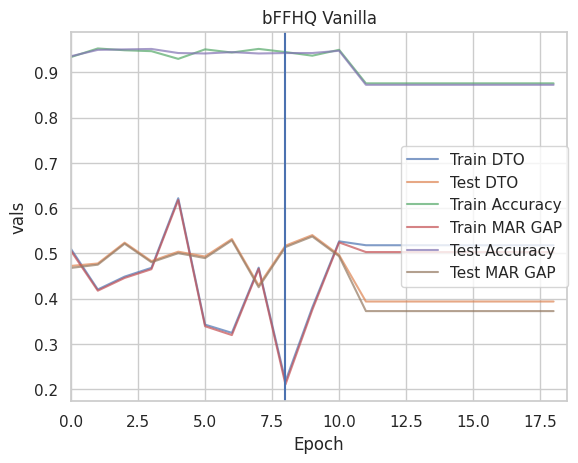

\textbf{bFFHQ DAdv} & 0.218 &  0.517 &  0.945 &  0.943 &  0.21 &  0.514 &  8 \\


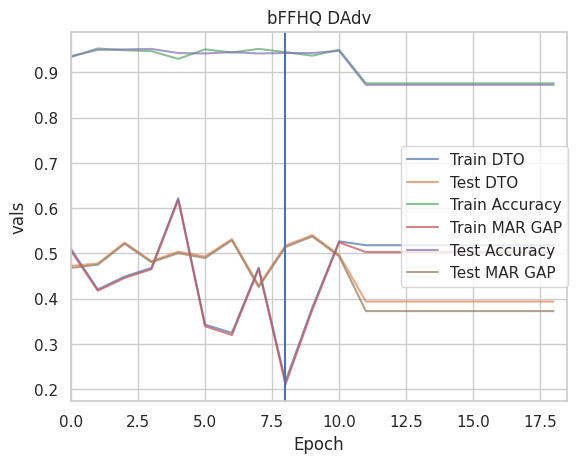

\textbf{bFFHQ BTEO} & 0.0637 &  0.42 &  0.938 &  0.906 &  0.0144 &  0.41 &  19 \\


FileNotFoundError: [Errno 2] No such file or directory: 'results/dev/bffhq/BTEO_dropout0.5_lr0.001_batch_size32_BTResampling_BTObjEO_lr_schedulerdefault_n_hidden1_softmaxFalse_weight_decay0.0/opt.yaml'

In [73]:
print (results_dict.keys())

bffhq_vanillaN = results_dict['alysis/bffhq_vanilla']
bffhq_dadvN = results_dict['alysis/bffhq_dadv']
bffhq_bteoN = results_dict['alysis/bffhq_BTEO']
bffhq_inlpN = results_dict['alysis/bffhq_inlp']
print_results_p(bffhq_vanillaN, "bFFHQ Vanilla", True, True)
print_results_p(bffhq_dadvN, "bFFHQ DAdv", True)
print_results_p(bffhq_bteoN, "bFFHQ BTEO", True)
print_results_p(bffhq_inlpN, "bFFHQ INLP", True, INLP=True)
#print_hyp(results_dict)
results_dict_bffhqN = {"bFFHQ \\Vanilla":  bffhq_vanillaN, "bFFHQ \\BT" :bffhq_bteoN, 
                      "bFFHQ \\DAdv": bffhq_dadvN, "bFFHQ \\INLP": bffhq_inlpN}
print_results(bffhq_dadvN, "bFFHQ \\DAdv", True)


In [4]:
def dto_averages(results):
    print(results[0].keys())
dto_averages([results_dict_compas])

NameError: name 'results_dict_compas' is not defined

In [2]:
import yaml, string
def pretty_text(textin):
      text=str(textin)
      if text == 'nan' or text == "None":
            return  '-'
      text = text.replace("adv_diverse_lambda", "$\lambdadiff$").replace("adv_lambda", "$\lambdaadv$")
      text=" ".join(  [ word[0].upper() + word[1:] for word in  text.split("_") ])
      text=text.replace("Lr", "LR").replace("N Hidden", "Hidden Layers")
      return text
def hyp_order(hyp):
  d={
    "opt_dir": 1000 ,
    "weight_decay": 22 ,
    "softmax": 2,
    "adv_debiasing": 200 ,
    "adv_diverse_lambda": 202 ,
    "adv_num_subDiscriminator": 203 ,
    "BTObj": 102,
    "dropout": 10,
    "lr": 21 ,
    "batch_size": 9 ,
    "adv_lambda": 201 ,
    "BT": 101 ,
    "lr_scheduler": 20 ,
    "adv_corr_loss": 204 ,
    "hidden_size": 5 ,
    "INLP_min_acc": 303 ,
    "INLP_n": 302 ,
    "n_hidden": 4 ,
    "INLP_discriminator_reweighting": 304 ,
    "INLP_by_class": 305 ,
  }
  if hyp in d:
      return d[hyp]
  return 900
def print_hyp(results_dict):
    d={'opt_dir':{}}

    for k in results_dict.keys():
            best_row = get_best_result(results_dict[k])
            try:
                yaml_file=best_row.opt_dir
                #print (yaml_file)
                with open(yaml_file, 'r') as f:
                  opt = yaml.full_load(f) 
                  d['opt_dir'][k]=opt
            except:
                print("exception")
                opt={}
            #print (opt)
            for hyp, val in  (zip(  results_dict[k].index.names,   best_row.name)):
                if hyp not in d:
                    d[hyp]  ={}
                d[hyp][k]=val
                if hyp in opt:
                    #print ("Override", hyp, val, opt[hyp])
                    d[hyp][k]=opt[hyp]
                
           # print (d)
    count=0
    for i in sorted(d.keys(), key = hyp_order):
        print (  '    "'+ str(i) + '":' ,count, ","  )
        count+=1
    
    l=r"\textbf{Hyperparameter}"
    for exp in results_dict.keys():
       l+=r" & \textbf{" + exp + "}"
    l+=" \\\\ \hline \hline"
    print (l.replace('_', ' '))
    l=r"\textbf{Hyperparameter}"
    for exp in results_dict.keys():
       l+=r" & \textbf{" + re.sub(r'.*/', '', exp.replace("dev", "train")) + "}"
    l+=" \\\\ \hline \hline"
    print (l.replace('_', ' '))
    l=""

    for hyp in sorted(d.keys(), key = hyp_order):
        l="\\textbf{" + pretty_text(hyp) + "}"
        if hyp =='opt_dir': continue
        for exp in  results_dict.keys():
            
            if exp in d[hyp]:
               text=str(d[hyp][exp])
            elif hyp in d['opt_dir'][exp]:
                text = str(d['opt_dir'][exp][hyp])
            else:
                text = '-'

            l+=" & " + pretty_text(text)
        l+=" \\\\ "
        print (l.replace('_', ' '))
    
print_hyp(results_dict_bffhq)



NameError: name 'results_dict_bffhq' is not defined

In [10]:
results_dict_compas['COMPAS \\BTEO']

epoch  \
adv_num_subDiscriminator batch_size encoder_architecture adv_diverse_lambda adv_lambda weight_decay hidden_size n_hidden dropout softmax BT          adv_debiasing BTObj lr            
3                        1024       DecreasingNN         5.0                1.5        0.7          4           5        0.9     True    Resampling  False         EO    0.20    3.0   
                                                                                                                                         Reweighting False         EO    0.20    3.0   
                         2048       Fixed                5.0                1.5        0.0          4           2        0.0     True    Resampling  False         EO    0.01    3.0   
                                                                                       0.1          4           2        0.0     True    Resampling  False         EO    0.01   11.0   
                         4096       Fixed                5.0                1.5        0.0          4           2        0.0     True    Resampling  False         EO    0.01    6.0   
...                                                                                                                                                                              ...   
                         1024       Fixed                5.0                1.5        0.9          300         2        0.7     False   Resampling  False         EO    0.10    5.0   
                                                                                       0.7          300         2        0.7     False   Resampling  False         EO    0.10    1.0   
                                                                                       0.1          300         2        0.7     True    Resampling  False         EO    0.10   17.0   
                                                                                       0.0          300         2        0.7     True    Resampling  False         EO    0.10    0.0   
                                                                                       0.3          300         2        0.7     True    Resampling  False         EO    0.10   18.0   

                                                                                                                                                                                dev_DTO  \
adv_num_subDiscriminator batch_size encoder_architecture adv_diverse_lambda adv_lambda weight_decay hidden_size n_hidden dropout softmax BT          adv_debiasing BTObj lr               
3                        1024       DecreasingNN         5.0                1.5        0.7          4           5        0.9     True    Resampling  False         EO    0.20  0.388101   
                                                                                                                                         Reweighting False         EO    0.20  0.369423   
                         2048       Fixed                5.0                1.5        0.0          4           2        0.0     True    Resampling  False         EO    0.01  0.517396   
                                                                                       0.1          4           2        0.0     True    Resampling  False         EO    0.01  0.493681   
                         4096       Fixed                5.0                1.5        0.0          4           2        0.0     True    Resampling  False         EO    0.01  0.512620   
...                                                                                                                                                                                 ...   
                         1024       Fixed                5.0                1.5        0.9          300         2        0.7     False   Resampling  False         EO    0.10  0.448522   
                                                                                       0.7         

In [7]:
import scipy.stats.friedmanchisquare

ModuleNotFoundError: No module named 'scipy.stats.friedmanchisquare'

In [2]:
print_results(adult_vanilla, "Adult \\Vanilla", True, True)
print_results(adult_bteo, "Adult \\BT", True)
print_results(adult_dadv, "Adult \\DAdv", True)
print_results(adult_inlp, "Adult \\INLP", True, INLP=True)

print_results(compas_vanilla, "COMPAS \\Vanilla", True)
print_results(compas_bteo, "COMPAS \\BT", True, False)
print_results(compas_dadv, "COMPAS \\DAdv", True, False)
print_results(compas_inlp, "COMPAS \\INLP", True, False, INLP=True)
print_results(bios_vanilla, "Bios \\Vanilla", True)
print_results(bios_dadv, "Bios \\DAdv", True)
#print_results_p(bios_cdadv, "Bios_cdadv", True)
print_results(bios_bteo, "Bios \\BTEO", True)
print_results(bios_inlp, "Bios \\INLP", True, INLP=True)

print_results(celebmhq_bm_vanilla, "CelebA \\Vanilla", True)
print_results(celebmhq_bm_dadv, "CelebA \\DAdv", True)
print_results(celebmhq_bm_bteo, "CelebA \\BTEO", True)
print_results(celebmhq_bm_inlp, "CelebA \\INLP", True, INLP=True)
print_results(bffhq_vanilla, "bFFHQ \\Vanilla", True, True)
print_results(bffhq_dadv, "bFFHQ \\DAdv", True)
print_results(bffhq_bteo, "bFFHQ \\BTEO", True)
print_results(bffhq_inlp, "bFFHQ \\INLP", True, INLP=True)



NameError: name 'print_results' is not defined

In [ ]:
resultsa_d_v2

\textbf{Adult \Vanilla} & 0.145 &  0.152 &  0.859 &  0.852 &  0.0363 &  0.0376 &  12 \\


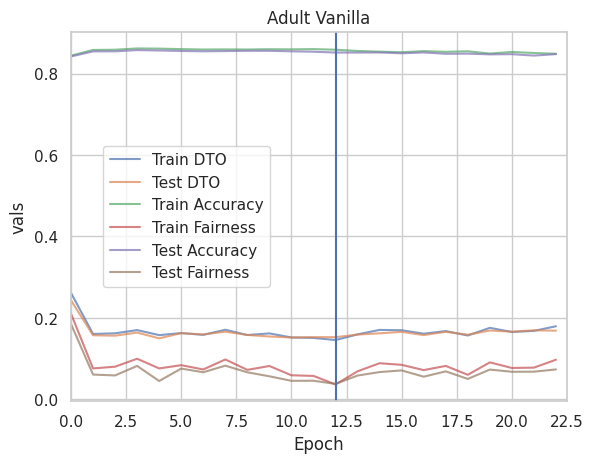

In [3]:
ax  = print_results_p(adult_vanilla, "Adult \\Vanilla", True)

In [10]:
get_best_result

NameError: name 'get_best_result' is not defined

In [3]:
import numpy as np
#compas_bteo[np.in1d( compas_bteo.index.get_level_values ( compas_bteo.index.names.index('softmax')), True)]
print(get_best_result(compas_vanilla, {'softmax' : [False]}).index)
df_nosoft = get_best_result(compas_vanilla, {'softmax' : [False]})

epoch_plot(df_nosoft, "Vanilla Softmax False", True)

NameError: name 'np' is not defined

In [37]:
df_nosoft

epoch                                                             9.0
dev_DTO                                                       0.41869
test_DTO                                                     0.438395
dev_performance                                              0.585648
dev_fairness                                                 0.939881
test_performance                                             0.588553
test_fairness                                                0.848668
opt_dir             results/dev/COMPAS_race/vanilla_lr1_batch_size...
Name: Vanilla Softmax False, dtype: object

In [33]:
compas_vanilla.index.names

FrozenList(['BT', 'BTObj', 'adv_debiasing', 'adv_num_subDiscriminator', 'adv_diverse_lambda', 'adv_lambda', 'lr', 'batch_size', 'weight_decay', 'encoder_architecture', 'n_hidden', 'lr_scheduler', 'softmax'])

In [13]:
def get_best_result(df, restriction=False, assume_match_if_no_index=True):

    if  not restriction:
       return df.iloc[df['dev_DTO'].argmin()]
    valid_keys=[]
    for r in restriction.keys():
        if r not in df.index.names and not assume_match_if_no_index:
            print (f"{r} is not in {df.index.names} and Ive been told to return nothing if this is the case as assume_match_if_no_index={assume_match_if_no_index}")
            return None
        valid_keys.append(r)

    _df=df
    for key in valid_keys:
        value=restriction[key]
        _df = _df[np.in1d( _df.index.get_level_values ( _df.index.names.index(key)), [value]) ]
    return _df.iloc[_df['dev_DTO'].argmin()]


In [1]:
bff

NameError: name 'df' is not defined

In [ ]:
results_dict = analysis.retrive_results("bffhq", log_dir="./results/")

In [ ]:
results_dict.keys()

In [ ]:
index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler", "encoder_architecture", "n_hidden", "softmax", "hidden_size"]


dataset="COMPAS_race"
exp_id="vanilla"

selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
#I moved these
if 0:
  resultsc_d_v2 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'!encoder_architecture' : 'Fixed' },
  )

try: os.remove(save_path)
except:
        pass
print (save_path)
resultsc_d_v1 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'encoder_architecture' : 'Fixed' },
)

In [ ]:
exp_id="BTEO"
resultsc_d_b1 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'encoder_architecture' : 'Fixed' },
)


In [4]:
#for s, y in enumerate ( zip( resultsc_d_v1.index.names, get_best_result(resultsc_d_v1).name)):
#  print( s, y)

0 ('BT', nan)
1 ('BTObj', nan)
2 ('adv_debiasing', False)
3 ('adv_num_subDiscriminator', 3)
4 ('adv_lambda', 1.5)
5 ('lr', 0.01)
6 ('dropout', 0.1)
7 ('batch_size', 2048)
8 ('weight_decay', 0.5)
9 ('lr_scheduler', 'default')
10 ('encoder_architecture', 'Fixed')
11 ('n_hidden', 2)
12 ('softmax', True)
13 ('hidden_size', 4)


In [7]:
#from fairlib.src.analysis.utils import get_dir
#x  = get_dir("results", "dev/adult", "results", "checkpoint_epoch", "vanilla", hyper_filter={'!encoder_architecture' : 'Fixed' },)

In [9]:
results_dict = analysis.retrive_results("celebMHQ", log_dir="./results/")
results_dict.keys()

results


dict_keys(['sis/celebMHQ_BTEO', 'sis/celebMHQ_dadv', 'sis/celebMHQ_inlp', 'sis/celebMHQ_vanilla'])

In [ ]:
index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler", "encoder_architecture", "n_hidden", "softmax", "hidden_size"]

import os
dataset="adult"
exp_id="BTEO"

selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsa_d_b1 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'!encoder_architecture' : 'Fixed' },
)

In [2]:
index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler", "encoder_architecture", "n_hidden", "softmax", "hidden_size"]


dataset="adult"
exp_id="BTEO"

selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsa_d_b2 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'!encoder_architecture' : 'Fixed' },
)

NameError: name 'os' is not defined

In [2]:
ms=partial(modelselection, hyper_filter={'BT_Obj' : 'Downdampling'})

In [4]:
#results_dir="results"
ms=partial(modelselection, hyper_filter={'n_hidden' : '0'})
ms=partial(modelselection, hyper_filter={'n_hidden' : '0'})#,  project_dir="backup")
#ms=partial(modelselection, hyper_filter={ "softmax": "False" })
msbackup=partial(modelselection, project_dir="backup")
msperf=partial(modelnoselection, selection_criterion="performance",  model_id= "vanilla")

In [3]:
get_best_result(resultsc_d_v2).index.names

NameError: name 'resultsc_d_v2' is not defined

In [6]:
dataset="bffhq"
save_path= os. path.join(results_dir,project_dir,dataset,"accuracy"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
bffhq = msperf(project_dir= project_dir+"/"+dataset,save_path = save_path, n_jobs=16)
dataset="celebMHQ"
save_path= os. path.join(results_dir,project_dir,dataset,"accuracy"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
celeb= msperf(project_dir= project_dir+"/"+dataset,save_path = save_path, n_jobs=14)



dataset="adult"
save_path= os. path.join(results_dir,project_dir,dataset,"accuracy"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
adult = msperf(project_dir= project_dir+"/"+dataset,save_path = save_path, n_jobs=14)


./results/dev/bffhq/accuracy_analysis_DTO.pkl
Searching dir : results/vanilla/dev/bffhq/checkpoint_epoch
exps: 1191


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 508 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 1191 out of 1191 | elapsed:    2.3s finished


Retrieved 1191 results from 1191
./results/dev/celebMHQ/accuracy_analysis_DTO.pkl
Searching dir : results/vanilla/dev/celebMHQ/checkpoint_epoch
exps: 144


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  44 tasks      | elapsed:    1.0s


Retrieved 144 results from 144


[Parallel(n_jobs=14)]: Done 144 out of 144 | elapsed:    1.8s finished


In [23]:
dataset="Bios_gender"
save_path= os. path.join(results_dir,project_dir,dataset,"accuracy"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
bios = msperf(project_dir= project_dir+"/"+dataset,save_path = save_path, n_jobs=14, override_checkpoint_name="BEST")


dataset="COMPAS_race"
save_path= os. path.join(results_dir,project_dir,dataset,"accuracy"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
compas = msperf(project_dir= project_dir+"/"+dataset,save_path = save_path, n_jobs=14, override_checkpoint_name="BEST")



./results/dev/Bios_gender/accuracy_analysis_DTO.pkl
Searching dir : results/vanilla/dev/Bios_gender/BEST
exps: 161


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  60 tasks      | elapsed:    0.8s
[Parallel(n_jobs=14)]: Done 161 out of 161 | elapsed:    1.8s finished


Retrieved 161 results from 161
./results/dev/COMPAS_race/accuracy_analysis_DTO.pkl
Searching dir : results/vanilla/dev/COMPAS_race/BEST
exps: 48
Retrieved 48 results from 48


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  31 out of  48 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  41 out of  48 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done  48 out of  48 | elapsed:    0.0s finished


In [39]:
get_best_result(celeb, selection_criterion='dev_performance')
print_results(celeb, "\\CelebA \\Vanilla Perf", True,selection_criterion='dev_performance')
print_results(adult, "\\Adult \\Vanilla Perf", True,selection_criterion='dev_performance')
print_results(bios, "\\Bios \\Vanilla Perf", True,selection_criterion='dev_performance')
print_results(bffhq, "\\bffhq \\Vanilla Perf", True,selection_criterion='dev_performance')
print_results(compas, "\\COMPAS \\Vanilla Perf", True,selection_criterion='dev_performance')


\textbf{\CelebA \Vanilla Perf} & 0.43 &  0.417 &  0.935 &  0.932 &  0.425 &  0.412 &  22 \\
\textbf{\Adult \Vanilla Perf} & 0.156 &  0.152 &  0.864 &  0.858 &  0.0762 &  0.0535 &  4 \\
\textbf{\Bios \Vanilla Perf} & 0.267 &  0.257 &  0.797 &  0.803 &  0.173 &  0.165 &  51 \\
\textbf{\bffhq \Vanilla Perf} & 0.638 &  0.547 &  0.952 &  0.95 &  0.636 &  0.544 &  11 \\
\textbf{\COMPAS \Vanilla Perf} & 0.487 &  0.478 &  0.711 &  0.672 &  0.392 &  0.348 &  6 \\


In [34]:
get_best_result(celeb,selection_criterion='dev_performance')

epoch                                                            22.0
dev_DTO                                                      0.430326
test_DTO                                                     0.417143
dev_performance                                                 0.935
dev_fairness                                                 0.574611
test_performance                                             0.932267
test_fairness                                                0.588393
opt_dir             results/dev/celebMHQ/vanilla_dropout0.0_lr0.00...
Name: (nan, nan, False, 3, 1.5, 0.003, 0.0, 32, 0.0, StepLR, Fixed, 2, True, 300), dtype: object

In [14]:
celeb

epoch  \
BT  BTObj adv_debiasing adv_num_subDiscriminator adv_lambda lr    dropout batch_size weight_decay lr_scheduler encoder_architecture n_hidden softmax hidden_size          
NaN NaN   False         3                        1.5        0.030 0.0     64         0.3          default      Fixed                2        True    300            0.0   
                                                            0.003 0.1     128        0.0          StepLR       Fixed                2        True    300           10.0   
                                                                                     0.1          StepLR       Fixed                2        True    300            0.0   
                                                                                     0.3          StepLR       Fixed                2        True    300            0.0   
                                                                                     0.0          default      Fixed                2        True    300           10.0   
...                                                                                                                                                                 ...   
                                                            0.030 0.2     32         0.1          default      Fixed                2        True    300            0.0   
                                                                          64         0.0          StepLR       Fixed                2        True    300            0.0   
                                                                                     0.1          StepLR       Fixed                2        True    300            0.0   
                                                                                     0.0          default      Fixed                2        True    300            0.0   
                                                                                     0.1          default      Fixed                2        True    300            0.0   

                                                                                                                                                                   dev_DTO  \
BT  BTObj adv_debiasing adv_num_subDiscriminator adv_lambda lr    dropout batch_size weight_decay lr_scheduler encoder_architecture n_hidden softmax hidden_size             
NaN NaN   False         3                        1.5        0.030 0.0     64         0.3          default      Fixed                2        True    300          0.174000   
                                                            0.003 0.1     128        0.0          StepLR       Fixed                2        True    300          0.419615   
                                                                                     0.1          StepLR       Fixed                2        True    300          0.174000   
                                                                                     0.3          StepLR       Fixed                2        True    300          0.174000   
                                                                                     0.0          default      Fixed                2        True    300          0.419615   
...                                                                                                                                                                    ...   
                                                            0.030 0.2     32         0.1          default      Fixed                2        True    300          0.174000   
                                                                          64         0.0          StepLR       Fixed                2        True    300          0.174000   
                                                                                     0.1          StepLR       Fixed                2        True    300          0.174000   
                        

In [16]:

dataset="COMPAS_race"
save_path= os. path.join(results_dir,project_dir,dataset,"accuracy"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
compas = msperf(project_dir= project_dir+"/"+dataset,save_path = save_path, n_jobs=14)



dataset="bffhq"
save_path= os. path.join(results_dir,project_dir,dataset,"accuracy"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
bffhq = msperf(project_dir= project_dir+"/"+dataset,save_path = save_path, n_jobs=14)


./results/dev/COMPAS_race/accuracy_analysis_DTO.pkl
Searching dir : results/vanilla/dev/COMPAS_race/checkpoint_epoch
exps: 48


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  31 out of  48 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=14)]: Done  41 out of  48 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=14)]: Done  48 out of  48 | elapsed:    0.5s finished


Retrieved 48 results from 48
./results/dev/bffhq/accuracy_analysis_DTO.pkl
Searching dir : results/vanilla/dev/bffhq/checkpoint_epoch
exps: 1191


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  60 tasks      | elapsed:    0.1s
[Parallel(n_jobs=14)]: Done 596 tasks      | elapsed:    1.2s


Retrieved 1191 results from 1191


[Parallel(n_jobs=14)]: Done 1135 tasks      | elapsed:    2.0s
[Parallel(n_jobs=14)]: Done 1164 out of 1191 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=14)]: Done 1191 out of 1191 | elapsed:    2.1s finished


In [9]:
#index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler", "encoder_architecture", "n_hidden", "softmax", "hidden_size"]
from myanalysis.utils import modelselection
from functools import partial
import os
#selection_criterion="DTO"
dataset="bffhq"
project_dir="dev"
save_path= os. path.join(results_dir,project_dir,dataset,"nhidden_tmp"+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)


bffhq_vanilla_2 = ms(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "vanilla",
    project_dir= project_dir+"/"+dataset,
       save_path = save_path,
)

os.remove(save_path)
bffhq_inlp_2 = ms(
 
    model_id= "inlp",
    project_dir= project_dir+"/"+dataset,   save_path = save_path,
        checkpoint_name="INLP_checkpoint_epoch"
)




os.remove(save_path)
bffhq_dadv_2 = ms(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "dadv",
    project_dir= project_dir+"/"+dataset,   save_path = save_path,
)

os.remove(save_path)
bffhq_bteo_2 = ms(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

./results/dev/bffhq/nhidden_tmp_analysis_DTO.pkl
./results/dev/bffhq/nhidden_tmp_analysis_DTO.pkl


NameError: name 'ms' is not defined

In [6]:

save_path= os. path.join(results_dir,project_dir,dataset,"nhidden_tmp"+"_analysis_"+selection_criterion+".pkl")
project_dir="dev"
adult_bt={}
celeb_bt={}
compas_bt={}
bios_bt={}
bffhq_bt={}

msrw=partial(modelselection, hyper_filter={"BT": "Reweighting"})#,  project_dir="backup")
msrs=partial(modelselection, hyper_filter={'BT' : 'Resampling'})#,  project_dir="backup")
msds=partial(modelselection, hyper_filter={'BT' : 'Downsampling'})#,  project_dir="backup")

dataset="celebMHQ"

dnow=celeb_bt
dnow[dataset + ' \\BT Reweighting'] = msrw(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

#os.remove(save_path)
dnow[dataset + '\\BT Downsampling'] = msds(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

dnow[dataset + '\\BT Resampling'] = msrs(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)



hyper_filter= {'BT': 'Reweighting'}
Searching dir : results/BTEO/dev/celebMHQ/checkpoint_epoch
exps: 72


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    2.9s
[Parallel(n_jobs=16)]: Done  56 out of  72 | elapsed:    3.1s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  72 out of  72 | elapsed:    3.5s finished


Retrieved 72 results from 72
hyper_filter= {'BT': 'Downsampling'}
Searching dir : results/BTEO/dev/celebMHQ/checkpoint_epoch
exps: 72


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  26 out of  72 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  56 out of  72 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  72 out of  72 | elapsed:    0.7s finished


Retrieved 72 results from 72
hyper_filter= {'BT': 'Resampling'}
Searching dir : results/BTEO/dev/celebMHQ/checkpoint_epoch
exps: 82


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Retrieved 82 results from 82


[Parallel(n_jobs=16)]: Done  82 out of  82 | elapsed:    0.8s finished


In [7]:
alldicts=[]
###############################################
dnow=compas_bt
dataset="COMPAS_race"
dnow[dataset + ' \\BT Reweighting'] = msrw(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

os.remove(save_path)
dnow[dataset + '\\BT Downsampling'] = msds(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

dnow[dataset + '\\BT Resampling'] = msrs(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)
alldicts.append(dnow)
###############################################
dnow=bios_bt
dataset="Bios_gender"
dnow[dataset + ' \\BT Reweighting'] = msrw(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,
    checkpoint_name="BEST"

)

#os.remove(save_path)
dnow[dataset + '\\BT Downsampling'] = msds(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,
    checkpoint_name="BEST"
)

dnow[dataset + '\\BT Resampling'] = msrs(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,
    checkpoint_name="BEST"
)
alldicts.append(dnow)
#########################################################
dnow=bffhq_bt
dataset="bffhq"
dnow[dataset + ' \\BT Reweighting'] = msrw(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

#os.remove(save_path)
dnow[dataset + '\\BT Downsampling'] = msds(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

dnow[dataset + '\\BT Resampling'] = msrs(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)
alldicts.append(dnow)
###############################################
dataset="celebMHQ"
dnow=celeb_bt
dnow[dataset + ' \\BT Reweighting'] = msrw(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

#os.remove(save_path)
dnow[dataset + '\\BT Downsampling'] = msds(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

dnow[dataset + '\\BT Resampling'] = msrs(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)
alldicts.append(dnow)
###############################################
dnow=adult_bt
dataset="adult"
dnow[dataset + ' \\BT Reweighting'] = msrw(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

#os.remove(save_path)
dnow[dataset + '\\BT Downsampling'] = msds(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)

dnow[dataset + '\\BT Resampling'] = msrs(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",   save_path = save_path,
    project_dir= project_dir+"/"+dataset,

)
alldicts.append(dnow)


hyper_filter= {'BT': 'Reweighting'}
Searching dir : results/BTEO/dev/COMPAS_race/checkpoint_epoch
exps: 284


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 253 out of 284 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=16)]: Done 284 out of 284 | elapsed:    0.7s finished


Retrieved 284 results from 284
hyper_filter= {'BT': 'Downsampling'}
Searching dir : results/BTEO/dev/COMPAS_race/checkpoint_epoch
exps: 54
Retrieved 54 results from 54
hyper_filter= {'BT': 'Resampling'}


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  34 out of  54 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done  45 out of  54 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  54 out of  54 | elapsed:    0.2s finished


Searching dir : results/BTEO/dev/COMPAS_race/checkpoint_epoch
exps: 572


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 419 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 541 out of 572 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=16)]: Done 572 out of 572 | elapsed:    1.3s finished


Retrieved 572 results from 572
hyper_filter= {'BT': 'Reweighting'}
Searching dir : results/BTEO/dev/Bios_gender/BEST
exps: 128


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 123 out of 128 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=16)]: Done 128 out of 128 | elapsed:    1.7s finished


Retrieved 128 results from 128
hyper_filter= {'BT': 'Downsampling'}
Searching dir : results/BTEO/dev/Bios_gender/BEST
exps: 6
Retrieved 6 results from 6
hyper_filter= {'BT': 'Resampling'}


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   3 out of   6 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=16)]: Done   6 out of   6 | elapsed:    0.1s finished


Searching dir : results/BTEO/dev/Bios_gender/BEST
exps: 134


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  48 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 130 out of 134 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=16)]: Done 134 out of 134 | elapsed:    1.5s finished


Retrieved 134 results from 134
hyper_filter= {'BT': 'Reweighting'}
Searching dir : results/BTEO/dev/bffhq/checkpoint_epoch
exps: 616


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  48 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 616 out of 616 | elapsed:    1.2s finished


Retrieved 616 results from 616
hyper_filter= {'BT': 'Downsampling'}
Searching dir : results/BTEO/dev/bffhq/checkpoint_epoch
exps: 616


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 616 out of 616 | elapsed:    1.1s finished


Retrieved 616 results from 616
hyper_filter= {'BT': 'Resampling'}
Searching dir : results/BTEO/dev/bffhq/checkpoint_epoch
exps: 1576


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 496 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 1420 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 1545 out of 1576 | elapsed:    2.7s remaining:    0.1s
[Parallel(n_jobs=16)]: Done 1576 out of 1576 | elapsed:    2.8s finished


Retrieved 1576 results from 1576
hyper_filter= {'BT': 'Reweighting'}
Searching dir : results/BTEO/dev/celebMHQ/checkpoint_epoch
exps: 72


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  26 out of  72 | elapsed:    0.4s remaining:    0.6s
[Parallel(n_jobs=16)]: Done  41 out of  72 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  56 out of  72 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  72 out of  72 | elapsed:    0.8s finished


Retrieved 72 results from 72
hyper_filter= {'BT': 'Downsampling'}
Searching dir : results/BTEO/dev/celebMHQ/checkpoint_epoch
exps: 72


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  26 out of  72 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=16)]: Done  72 out of  72 | elapsed:    0.8s finished


Retrieved 72 results from 72
hyper_filter= {'BT': 'Resampling'}
Searching dir : results/BTEO/dev/celebMHQ/checkpoint_epoch
exps: 82


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  51 out of  82 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=16)]: Done  82 out of  82 | elapsed:    0.9s finished


Retrieved 82 results from 82
hyper_filter= {'BT': 'Reweighting'}
Searching dir : results/BTEO/dev/adult/checkpoint_epoch
exps: 252


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    3.6s
[Parallel(n_jobs=16)]: Done 252 out of 252 | elapsed:    7.0s finished


Retrieved 252 results from 252
hyper_filter= {'BT': 'Downsampling'}
Searching dir : results/BTEO/dev/adult/checkpoint_epoch
exps: 252


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    3.4s
[Parallel(n_jobs=16)]: Done 252 out of 252 | elapsed:    6.4s finished


Retrieved 252 results from 252
hyper_filter= {'BT': 'Resampling'}
Searching dir : results/BTEO/dev/adult/checkpoint_epoch
exps: 252


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    1.5s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    4.0s


Retrieved 252 results from 252


[Parallel(n_jobs=16)]: Done 252 out of 252 | elapsed:    6.9s finished


In [8]:
print_hyp(bios_bt)
count=0
header=True
for bt in alldicts:
  for k, v in bt.items():
    if count==1: header=False
    count=1
    print_results(v, k, Header=header)

    "softmax": 0 ,
    "encoder_architecture": 1 ,
    "n_hidden": 2 ,
    "hidden_size": 3 ,
    "batch_size": 4 ,
    "dropout": 5 ,
    "lr_scheduler": 6 ,
    "lr": 7 ,
    "weight_decay": 8 ,
    "BT": 9 ,
    "BTObj": 10 ,
    "adv_debiasing": 11 ,
    "adv_lambda": 12 ,
    "adv_num_subDiscriminator": 13 ,
    "opt_dir": 14 ,
\textbf{Hyperparameter} & \textbf{Bios gender \BT Reweighting} & \textbf{Bios gender\BT Downsampling} & \textbf{Bios gender\BT Resampling} \\ \hline \hline
\textbf{Hyperparameter} & \textbf{Bios gender \BT Reweighting} & \textbf{Bios gender\BT Downsampling} & \textbf{Bios gender\BT Resampling} \\ \hline \hline
\textbf{Softmax} & False & False & False \\ 
\textbf{Encoder Architecture} & Fixed & Fixed & Fixed \\ 
\textbf{Hidden Layers} & 2 & 2 & 2 \\ 
\textbf{Hidden Size} & 300 & 300 & 300 \\ 
\textbf{Batch Size} & 256 & 128 & 128 \\ 
\textbf{Dropout} & 0.1 & 0.3 & 0.3 \\ 
\textbf{LR Scheduler} & Default & ReduceLROnPlateau & Default \\ 
\textbf{LR} & 0.0003 

In [37]:
#get_dir("results", "dev/celebMHQ", "results", "checkpoint_epoch", "BTEO", {"BT": "Reweighting"})

[{'opt': {'ARL': False,
   'ARL_n': 1,
   'BT': 'Reweighting',
   'BTObj': 'EO',
   'DyBT': None,
   'DyBTObj': None,
   'DyBTalpha': 0.1,
   'DyBTinit': 'original',
   'FCL': False,
   'FCLObj': 'g',
   'GAP_metric_name': 'TPR_GAP',
   'GBT': False,
   'GBTObj': None,
   'GBT_N': None,
   'GBT_alpha': 1,
   'INLP': False,
   'INLP_by_class': False,
   'INLP_discriminator_reweighting': None,
   'INLP_min_acc': 0.0,
   'INLP_n': 300,
   'Performance_metric_name': 'accuracy',
   'activation_function': 'Tanh',
   'adv_BT': None,
   'adv_BTObj': None,
   'adv_activation_function': 'ReLu',
   'adv_batch_norm': False,
   'adv_batch_size': 128,
   'adv_checkpoint_interval': 1,
   'adv_corr_loss': False,
   'adv_debiasing': False,
   'adv_decoupling': False,
   'adv_decoupling_labelled_proportion': 1.0,
   'adv_diverse_lambda': 5.0,
   'adv_dropout': 0.0,
   'adv_epochs': 100,
   'adv_epochs_since_improvement': 5,
   'adv_gated': False,
   'adv_gated_mapping': None,
   'adv_gated_type': 'Augme

      & \text bf{Train DTO} & \textbf{Test DTO} & \textbf{Train Accuracy} & \textbf{Test Accuracy} & \textbf{Train MAR GAP} & \textbf{Test MAR GAP} & \textbf{Epoch} \\
\textbf{bFFHQ Vanilla} & 0.218 &  0.517 &  0.945 &  0.943 &  0.21 &  0.514 &  8 \\
\textbf{bFFHQ BTEO} & 0.092 &  0.269 &  0.911 &  0.903 &  0.0231 &  0.251 &  5 \\
\textbf{bFFHQ DAdv} & 0.218 &  0.517 &  0.945 &  0.943 &  0.21 &  0.514 &  8 \\
\textbf{bFFHQ INLP} & 0.369 &  0.316 &  0.74 &  0.711 &  0.261 &  0.127 &  16 \\
    "softmax": 0 ,
    "encoder_architecture": 1 ,
    "n_hidden": 2 ,
    "hidden_size": 3 ,
    "batch_size": 4 ,
    "dropout": 5 ,
    "lr_scheduler": 6 ,
    "lr": 7 ,
    "weight_decay": 8 ,
    "BT": 9 ,
    "BTObj": 10 ,
    "adv_debiasing": 11 ,
    "adv_lambda": 12 ,
    "adv_num_subDiscriminator": 13 ,
    "opt_dir": 14 ,
\textbf{Hyperparameter} & \textbf{bFFHQ \Vanilla} & \textbf{bFFHQ \BT} & \textbf{bFFHQ \DAdv} & \textbf{bFFHQ \INLP} \\ \hline \hline
\textbf{Hyperparameter} & \textbf{bFF

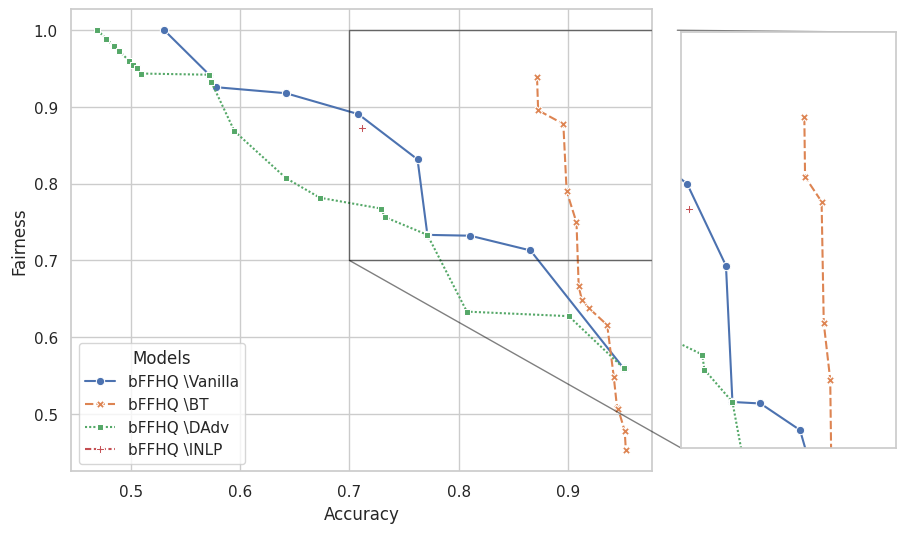

In [78]:

print_results(bffhq_vanilla_2, "bFFHQ Vanilla", True, True)
print_results(bffhq_bteo_2, "bFFHQ BTEO", True)
print_results(bffhq_dadv_2, "bFFHQ DAdv", True)
print_results(bffhq_inlp_2, "bFFHQ INLP", True,INLP=True)

results_dict_bffhq_2={"bFFHQ \\Vanilla":  bffhq_vanilla_2, 
                      "bFFHQ \\BT" :bffhq_bteo_2, 
                      "bFFHQ \\DAdv": bffhq_dadv_2, 
                      "bFFHQ \\INLP": bffhq_inlp_2}

#print_results_p(bffhq_inlp_2, "bFFHQ INLP", True, INLP=True)
print_hyp(results_dict_bffhq_2)
makePlot(results_dict_bffhq_2)

In [47]:
bffhq_vanilla_2

epoch  \
BT  BTObj adv_debiasing adv_num_subDiscriminator adv_lambda lr  dropout batch_size weight_decay lr_scheduler encoder_architecture n_hidden softmax hidden_size          
NaN NaN   False         3                        1.5        0.3 0.1     32         0.0          default      Fixed                0        False   300            0.0   
                                                                                   0.1          default      Fixed                0        False   300            3.0   
                                                                                   0.3          default      Fixed                0        False   300           11.0   
                                                                                   0.5          default      Fixed                0        False   300           17.0   
                                                                                   0.8          default      Fixed                0        False   300            3.0   
...                                                                                                                                                               ...   
                                                            3.0 0.5     64         0.0          StepLR       Fixed                0        True    300            0.0   
                                                                                   0.1          StepLR       Fixed                0        True    300           11.0   
                                                                                   0.3          StepLR       Fixed                0        True    300           12.0   
                                                                                   0.5          StepLR       Fixed                0        True    300            2.0   
                                                                                   0.8          StepLR       Fixed                0        True    300            2.0   

                                                                                                                                                                 dev_DTO  \
BT  BTObj adv_debiasing adv_num_subDiscriminator adv_lambda lr  dropout batch_size weight_decay lr_scheduler encoder_architecture n_hidden softmax hidden_size             
NaN NaN   False         3                        1.5        0.3 0.1     32         0.0          default      Fixed                0        False   300          0.336494   
                                                                                   0.1          default      Fixed                0        False   300          0.409281   
                                                                                   0.3          default      Fixed                0        False   300          0.419636   
                                                                                   0.5          default      Fixed                0        False   300          0.414339   
                                                                                   0.8          default      Fixed                0        False   300          0.415971   
...                                                                                                                                                                  ...   
                                                            3.0 0.5     64         0.0          StepLR       Fixed                0        True    300          0.470793   
                                                                                   0.1          StepLR       Fixed                0        True    300          0.244200   
                                                                                   0.3          StepLR       Fixed                0        True    300          0.354455   
                                                                      

In [43]:
results_dict_bffhq_2={"bFFHQ \\Vanilla":  bffhq_vanilla_2, 
                      "bFFHQ \\INLP": bffhq_inlp_2}


print_results(bffhq_vanilla_2, "bFFHQ Vanilla", True, True)

print_results(bffhq_inlp_2, "bFFHQ INLP", True,INLP=True)

#print_results_p(bffhq_inlp_2, "bFFHQ INLP", True, INLP=True)
print_hyp(results_dict_bffhq_2)

      & \text bf{Train DTO} & \textbf{Test DTO} & \textbf{Train Accuracy} & \textbf{Test Accuracy} & \textbf{Train MAR GAP} & \textbf{Test MAR GAP} & \textbf{Epoch} \\
\textbf{bFFHQ Vanilla} & 0.218 &  0.517 &  0.945 &  0.943 &  0.21 &  0.514 &  8 \\
\textbf{bFFHQ INLP} & 0.15 &  0.221 &  0.861 &  0.83 &  0.0567 &  0.141 &  16 \\
    "softmax": 0 ,
    "encoder_architecture": 1 ,
    "n_hidden": 2 ,
    "hidden_size": 3 ,
    "batch_size": 4 ,
    "dropout": 5 ,
    "lr_scheduler": 6 ,
    "lr": 7 ,
    "weight_decay": 8 ,
    "BT": 9 ,
    "BTObj": 10 ,
    "adv_debiasing": 11 ,
    "adv_lambda": 12 ,
    "adv_num_subDiscriminator": 13 ,
    "opt_dir": 14 ,
\textbf{Hyperparameter} & \textbf{bFFHQ \Vanilla} & \textbf{bFFHQ \INLP} \\ \hline \hline
\textbf{Hyperparameter} & \textbf{bFFHQ \Vanilla} & \textbf{bFFHQ \INLP} \\ \hline \hline
\textbf{Softmax} & False & False \\ 
\textbf{Encoder Architecture} & Fixed & Fixed \\ 
\textbf{Hidden Layers} & 0 & 0 \\ 
\textbf{Hidden Size} & 300 & 51

In [6]:


dataset="adult"

save_path_backup= os. path.join(results_dir,"backup",dataset,"decreasingtest"+"_analysis_"+selection_criterion+".pkl")
print(save_path_backup)
try: os.remove(save_path_backup)
except:
        pass
print (save_path_backup)

adult_vanilla_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "vanilla",
    project_dir= "backup/"+dataset,   save_path = save_path_backup,
)

#os.remove(save_path)
adult_dadv_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "dadv",
    project_dir= "backup/"+dataset,save_path = save_path_backup,
)
#os.remove(save_path)
adult_inlp_2 = msbackup(
 
    model_id= "inlp",
    project_dir= "backup/"+dataset,save_path = save_path_backup,
        checkpoint_name="INLP_checkpoint_epoch"
)



#os.remove(save_path)
adult_bteo_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",
    project_dir= "backup/"+dataset,save_path = save_path_backup,

)
#os.


./results/backup/adult/decreasingtest_analysis_DTO.pkl
./results/backup/adult/decreasingtest_analysis_DTO.pkl
Searching dir : results/vanilla/dev/adult/checkpoint_epoch
exps: 553


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    4.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    8.8s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   15.5s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   23.9s
[Parallel(n_jobs=16)]: Done 553 out of 553 | elapsed:   30.7s finished


Retrieved 553 results from 553
Searching dir : results/dadv/dev/adult/checkpoint_epoch
exps: 13392


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    7.8s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   15.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   24.3s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   34.1s
[Parallel(n_jobs=16)]: Done 850 tasks      | elapsed:   45.5s
[Parallel(n_jobs=16)]: Done 1120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=16)]: Done 1426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:  1.5min
[Parallel(n_jobs=16)]: Done 2146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=16)]: Done 2560 tasks      | elapsed:  2.2min
[Parallel(n_jobs=16)]: Done 3010 tasks      | elapsed:  2.6min
[Parallel(n_jobs=16)]: Done 3496 tasks      | elapsed:  3.0min
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:  3.5min
[Parallel(n_jobs=16)]: Done 4576 tasks      | e

Retrieved 13392 results from 13392
Searching dir : results/inlp/dev/adult/INLP_checkpoint_epoch
exps: 57


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  38 out of  57 | elapsed:    1.3s remaining:    0.7s
[Parallel(n_jobs=16)]: Done  50 out of  57 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  57 out of  57 | elapsed:    1.6s finished


Retrieved 57 results from 57
Searching dir : results/BTEO/dev/adult/checkpoint_epoch
exps: 756


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    2.3s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    7.9s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   13.2s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   22.2s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   30.9s


Retrieved 756 results from 756


[Parallel(n_jobs=16)]: Done 756 out of 756 | elapsed:   37.5s finished


In [22]:

dataset="COMPAS_race"

save_path_backup= os. path.join(results_dir,"backup",dataset,"decreasingtest"+"_analysis_"+selection_criterion+".pkl")
print(save_path_backup)
try: os.remove(save_path_backup)
except:
        pass
print (save_path_backup)

COMPAS_race_vanilla_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "vanilla",
    project_dir= "backup/"+dataset,   save_path = save_path_backup,
)

#os.remove(save_path)
COMPAS_race_dadv_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "dadv",
    project_dir= "backup/"+dataset,save_path = save_path_backup,
)
#os.remove(save_path)
COMPAS_race_inlp_2 = msbackup(
 
    model_id= "inlp",
    project_dir= "backup/"+dataset,save_path = save_path_backup,
        checkpoint_name="INLP_checkpoint_epoch"
)



#os.remove(save_path)
COMPAS_race_bteo_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",
    project_dir= "backup/"+dataset,save_path = save_path_backup,

)
#os.

#os.

./results/backup/COMPAS_race/decreasingtest_analysis_DTO.pkl
./results/backup/COMPAS_race/decreasingtest_analysis_DTO.pkl


KeyboardInterrupt: 

In [28]:
#os.remove(save_path)
COMPAS_race_dadv_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "dadv",
    project_dir= "backup/"+dataset,save_path = save_path_backup,
)

WARNING, no files found in dir: results/dadv/backup/COMPAS_race/checkpoint_epoch


SystemExit: 1

In [24]:
#os.remove(save_path)
COMPAS_race_bteo_2 = msbackup(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= "BTEO",
    project_dir= "backup/"+dataset,save_path = save_path_backup,

)
#os.


Searching dir : results/BTEO/backup/COMPAS_race/checkpoint_epoch
exps: 2


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Retrieved 2 results from 2


[Parallel(n_jobs=16)]: Done   2 out of   2 | elapsed:    1.4s finished


Searching dir : results/dadv/backup/adult/checkpoint_epoch
exps: 576


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    1.6s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    5.5s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   11.4s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   16.9s
[Parallel(n_jobs=16)]: Done 576 out of 576 | elapsed:   22.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of   2 | elapsed:    0.1s finished


Retrieved 576 results from 576
Searching dir : results/inlp/backup/adult/INLP_checkpoint_epoch
exps: 2
Retrieved 2 results from 2
Searching dir : results/BTEO/backup/adult/checkpoint_epoch
exps: 408


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    5.6s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   10.5s


Retrieved 408 results from 408


[Parallel(n_jobs=16)]: Done 408 out of 408 | elapsed:   15.9s finished


In [29]:
results_dict_COMPAS_race_2={"COMPAS_race \\Vanilla":  COMPAS_race_vanilla_2, "COMPAS_race \\BT" :COMPAS_race_bteo_2} 
                      #"COMPAS_race \\DAdv": COMPAS_race_dadv_2}
                            #"COMPAS_race \\INLP": COMPAS_race_inlp_2}

#print_results_p(bffhq_inlp_2, "bFFHQ INLP", True, INLP=True)
print_hyp(results_dict_COMPAS_race_2)

results_dict_COMPAS_race_2={"Adult \\Vanilla":  adult_vanilla_2, "Adult \\BT" :adult_bteo_2, 
                      "Adult \\DAdv": adult_dadv_2, "Adult \\INLP": adult_inlp_2}

#print_results_p(bffhq_inlp_2, "bFFHQ INLP", True, INLP=True)
print_hyp(results_dict_adult_2)


\textbf{Hyperparameter} & \textbf{COMPAS race \Vanilla} & \textbf{COMPAS race \BT} \\ \hline \hline
\textbf{Hyperparameter} & \textbf{COMPAS race \Vanilla} & \textbf{COMPAS race \BT} \\ \hline \hline
\textbf{BT} & - & Reweighting \\ 
\textbf{BTObj} & - & EO \\ 
\textbf{adv debiasing} & False & False \\ 
\textbf{adv num subDiscriminator} & 3 & 3 \\ 
\textbf{adv lambda} & 1.5 & 1.5 \\ 
\textbf{lr} & 0.1 & 0.2 \\ 
\textbf{dropout} & 0.1 & 0.9 \\ 
\textbf{batch size} & 1024 & 1024 \\ 
\textbf{weight decay} & 0.0 & 0.7 \\ 
\textbf{lr scheduler} & default & - \\ 
\textbf{encoder architecture} & DecreasingNN & DecreasingNN \\ 
\textbf{n hidden} & 5 & 5 \\ 
\textbf{softmax} & False & True \\ 
\textbf{hidden size} & 4 & 4 \\ 
\textbf{Hyperparameter} & \textbf{Adult \Vanilla} & \textbf{Adult \BT} & \textbf{Adult \DAdv} & \textbf{Adult \INLP} \\ \hline \hline
\textbf{Hyperparameter} & \textbf{Adult \Vanilla} & \textbf{Adult \BT} & \textbf{Adult \DAdv} & \textbf{Adult \INLP} \\ \hline \hline
\text

In [33]:

print_results(COMPAS_race_vanilla_2, "COMPAS Vanilla", True, True)
print_results(COMPAS_race_bteo_2, "COMPAS BTEO", True)
#print_results(adult_dadv_2, "Adult DAdv", True)
#print_results(COMPAS_race_inlp_2, "Adult INLP", True,INLP=True)



      & \text bf{Train DTO} & \textbf{Test DTO} & \textbf{Train Accuracy} & \textbf{Test Accuracy} & \textbf{Train MAR GAP} & \textbf{Test MAR GAP} & \textbf{Epoch} \\
\textbf{COMPAS Vanilla} & 0.322 &  0.464 &  0.69 &  0.654 &  0.0853 &  0.31 &  28 \\
\textbf{COMPAS BTEO} & 0.369 &  0.458 &  0.66 &  0.609 &  0.144 &  0.237 &  3 \\


In [54]:
bffhq_inlp_2['opt_dir'][0]

'results/dev/bffhq/inlp_dropout0.1_lr1_batch_size32_INLP_by_classFalse_INLP_discriminator_reweightingNone_INLP_min_acc0.0_INLP_n50_hidden_size300_n_hidden2_softmaxFalse_weight_decay0.8/opt.yaml'

In [17]:
adult_vanilla_2

epoch  \
BT  BTObj adv_debiasing adv_num_subDiscriminator adv_lambda lr    dropout batch_size weight_decay lr_scheduler encoder_architecture n_hidden softmax hidden_size          
NaN NaN   False         3                        1.5        0.003 0.0     1024       0.3          default      DecreasingNN         2        False   4              0.0   
                                                                                     0.1          default      DecreasingNN         2        False   4              0.0   
                                                                                     0.0          default      DecreasingNN         2        False   4             28.0   
                                                            0.001 0.0     4096       0.3          StepLR       DecreasingNN         5        True    4             25.0   
                                                                                     0.1          StepLR       DecreasingNN         5        True    4             25.0   
...                                                                                                                                                                 ...   
                                                            0.100 0.4     4096       0.1          StepLR       DecreasingNN         5        False   4              0.0   
                                                                                     0.3          StepLR       DecreasingNN         5        False   4              0.0   
                                                                                     0.0          StepLR       DecreasingNN         5        True    4              0.0   
                                                                                     0.1          StepLR       DecreasingNN         5        True    4              3.0   
                                                                                     0.3          StepLR       DecreasingNN         5        True    4              3.0   

                                                                                                                                                                   dev_DTO  \
BT  BTObj adv_debiasing adv_num_subDiscriminator adv_lambda lr    dropout batch_size weight_decay lr_scheduler encoder_architecture n_hidden softmax hidden_size             
NaN NaN   False         3                        1.5        0.003 0.0     1024       0.3          default      DecreasingNN         2        False   4            0.238024   
                                                                                     0.1          default      DecreasingNN         2        False   4            0.238024   
                                                                                     0.0          default      DecreasingNN         2        False   4            0.158763   
                                                            0.001 0.0     4096       0.3          StepLR       DecreasingNN         5        True    4            0.232111   
                                                                                     0.1          StepLR       DecreasingNN         5        True    4            0.232234   
...                                                                                                                                                                    ...   
                                                            0.100 0.4     4096       0.1          StepLR       DecreasingNN         5        False   4            0.238024   
                                                                                     0.3          StepLR       DecreasingNN         5        False   4            0.238024   
                                                                                     0.0          StepLR       DecreasingNN         5        True    4            0.232776   
                        

In [18]:
#os.remove(save_path)


print_results(adult_vanilla_2, "Adult Vanilla", True, True)
print_results(adult_bteo_2, "Adult BTEO", True)
print_results(adult_dadv_2, "Adult DAdv", True)
print_results(adult_inlp_2, "Adult INLP", True,INLP=True)

results_dict_adult_2={"Adult \\Vanilla":  adult_vanilla_2, "Adult \\BT" :adult_bteo_2, 
                      "Adult \\DAdv": adult_dadv_2, "Adult \\INLP": adult_inlp_2}

#print_results_p(bffhq_inlp_2, "bFFHQ INLP", True, INLP=True)
print_hyp(results_dict_adult_2)
makePlot(results_dict_adult_2)

      & \text bf{Train DTO} & \textbf{Test DTO} & \textbf{Train Accuracy} & \textbf{Test Accuracy} & \textbf{Train MAR GAP} & \textbf{Test MAR GAP} & \textbf{Epoch} \\
\textbf{Adult Vanilla} & 0.146 &  0.152 &  0.863 &  0.854 &  0.0503 &  0.0425 &  10 \\
\textbf{Adult BTEO} & 0.151 &  0.158 &  0.851 &  0.849 &  0.0212 &  0.0436 &  2 \\
\textbf{Adult DAdv} & 0.15 &  0.154 &  0.859 &  0.854 &  0.0505 &  0.0517 &  5 \\
\textbf{Adult INLP} & 0.196 &  0.194 &  0.806 &  0.806 &  0.0262 &  0.0135 &  0 \\


In [43]:
print(bffhq_inlp_2['opt_dir'][0])

results/dev/bffhq/inlp_dropout0.3_lr1_batch_size32_INLP_by_classFalse_INLP_discriminator_reweightingNone_INLP_min_acc0.0_INLP_n50_hidden_size300_n_hidden2_softmaxTrue_weight_decay0.5/opt.yaml


In [6]:
resultsb_nh2_d_v2

Index(['epoch', 'dev_DTO', 'test_DTO', 'dev_performance', 'dev_fairness',
       'test_performance', 'test_fairness', 'opt_dir'],
      dtype='object')

In [ ]:
index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler", "encoder_architecture", "n_hidden", "softmax", "hidden_size"]


dataset="adult"
exp_id="vanilla"

selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsa_d_v2 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'encoder_architecture' : 'Fixed' },
)

In [ ]:
index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler", "encoder_architecture", "n_hidden", "softmax", "hidden_size"]


dataset="COMPAS_race"
exp_id="vanilla"

selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)

resultsc_d_v1 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'encoder_architecture' : 'Fixed' },
)

In [6]:
import myanalysis.utils
myanalysis.utils.get_best_result(resultsc_d_v2)

IndentationError: unindent does not match any outer indentation level (utils.py, line 53)

In [ ]:
resultsc_d_v2['epoch']

In [ ]:
index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler", "encoder_architecture", "n_hidden", "softmax", "hidden_size"]


dataset="adult"
exp_id="vanilla"

selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsa_d_v2 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'encoder_architecture' : 'Fixed' },
)

In [2]:

#get_best_result(resultsa_d_v1).index
get_best_result(resultsa_d_b2)

NameError: name 'resultsa_d_b2' is not defined

In [3]:
accuracy

NameError: name 'accuracy' is not defined

In [ ]:
print(resultsa_d_v2.index.names)

get_best_result(resultsa_d_v1)

In [ ]:

#expi_id should be the adv etc
exp_id = "vanilla"
project_dir="dev"


dataset="bffhq"
dataset= "Bios_gender"


results_dir="./results"
checkpoint_dir="results"
checkpoint_name="checkpoint_epoch"
epoch="11.00"
opts_file=Path('/home/user/fairlibcode/example_conf_file/'+dataset+"_"+exp_id+'.yaml')
print (opts_file)
Shared_options={}
GAP_metric_name=  "TPR_GAP"
Performance_metric_name = "accuracy"
selection_criterion="DTO"
if os.path.exists (opts_file) :
    Shared_options = yaml.safe_load(opts_file.read_text())
    print(Shared_options)
else:
    print ("Cant find shared opts file")
if 1:
    if "project_dir" in Shared_options.keys():
        project_dir=Shared_options['project_dir']
    if "results_dir" in Shared_options.keys():
        results_dir=Shared_options['results_dir']
    if "checkpoint_dir" in  Shared_options.keys():
        checkpoint_dir=Shared_options['checkpoint_dir']
    else:
        Shared_options['checkpoint_dir'] = checkpoint_dir
    if "checkpoint_name" in  Shared_options.keys():
        checkpoint_name=Shared_options['checkpoint_name']
    else:
        Shared_options['checkpoint_name'] = checkpoint_name
    if "GAP_metric_name" in  Shared_options.keys():
        GAP_metric_name=Shared_options['GAP_metric_name']
    else:
        Shared_options['GAP_metric_name'] = GAP_metric_name
    if "Performance_metric_name" in  Shared_options.keys():
        Performance_metric_name=Shared_options['Performance_metric_name']
    else:
        Shared_options['Performance_metric_name'] = Performance_metric_name
    if "selection_criterion" in  Shared_options.keys():
        selection_criterion=Shared_options['selection_criterion']
    else:
        Shared_options['selection_criterion'] = selection_criterion

In [ ]:

df=torch.load("/home/user/miniconda3/data/celeba/celeba_dev_pre.pt")



In [ ]:
df=torch.load("results/dev/Bios_gender/vanilla_dropout0.3_lr0.003/results/BEST_checkpoint.pth.tar")

In [ ]:
df

In [ ]:
df=torch.load("results/dev/celebMHQ/inlp_INLP_by_classFalse_INLP_discriminator_reweightingNone_INLP_min_acc0.0_INLP_n50/results/dev/celebMHQ/inlp_dropout0.1_lr0.01_batch_size64_INLP_by_classTrue_INLP_discriminator_reweightingFalse_INLP_min_acc0.5_INLP_n300_lr_schedulerdefault_weight_decay0.0/results/BEST_checkpoint.pth.tar")

In [ ]:
df

In [ ]:
df.head()['img_features'][0].shape

In [ ]:
def preprocess(df):
     m = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

     class QuickDataset(torch.utils.data.Dataset):
        def __init__(self, df, key='Image'):
          self.X=df[key]
        def __len__(self):
           'Denotes the total number of samples'
           return len(self.X)
        def __getitem__(self, index): 
           return self.X[index]
     m = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

     ds=QuickDataset(df)   
     dl=torch.utils.data.DataLoader(ds,batch_size=4)
     results=[]
     with torch.no_grad():
       for it, batch in enumerate(dl):
         #batchsize*1000 for resnet
         results+=m(batch)
     df['img_features']=results


In [ ]:

df=epoch_plot(compas_vanilla, "COMPAS Vanilla")
plt.title
df

In [ ]:
import glob
for dirin in glob.glob(os.path.join("results/dev/Bios_gender/vanilla_*")):
   # print (dirin)
    try: torch.load(dirin+'/results/BEST_checkpoint.pth.tar')
    except:
        print ('"'+ dirin+'/opts.yaml",')


In [ ]:
3e-5*10

In [ ]:
glob.glob(os.path.join("results/dev/Bios_gender/vanilla_*"))

In [ ]:
"results/dev/adult/BTEO_dropout0.0_lr0.1_batch_size4096_BTResampling_BTObjEO_lr_schedulerdefault_weight_decay0.0/results/BEST_checkpoint.pth.tar"

In [ ]:
adult_bteo

In [ ]:
celebmhq_bm_inlp

In [ ]:
adult_bteo.iloc[adult_bteo['dev_DTO'].argmin()]

get_best_result(celebmhq_bm_inlp).index

In [ ]:
splits.pivot(index="epoch", columns=

In [ ]:
dfm

In [ ]:
#torch.load("results/dev/bffhq/inlp_dropout0.5_lr3_batch_size64_INLP_by_classTrue_INLP_discriminator_reweightingNone_INLP_min_acc0.0_INLP_n50_hidden_size512_n_hidden0_softmaxFalse_weight_decay0.0/results/INLP_checkpoint_epoch16.00.pth.tar")

In [ ]:
get_dir("results", "dev/COMPAS_race", "results", "checkpoint_epoch", "vanilla_dropout0.9_lr0.2_batch_size1024_weight_decay0.7")

In [ ]:
#compas_vanilla

In [ ]:
print(analysis.retrive_results("adult", log_dir="./results/").keys())
print(analysis.retrive_results("COMPAS_race", log_dir="./results/").keys())
print(analysis.retrive_results("Bios_gender", log_dir="./results/").keys())
print(analysis.retrive_results("celebMHQ", log_dir="./results/").keys())
print(analysis.retrive_results("bffhq", log_dir="./results/").keys())

In [12]:

print_hyp(results_dict_compas)
print_hyp(results_dict_adult)
print_hyp(results_dict_bios)
print_hyp(results_dict_celebmhq_bm)
print_hyp(results_dict_bffhq)



\textbf{Hyperparameter} & \textbf{COMPAS vanilla} & \textbf{COMPAS BTEO} & \textbf{COMPAS DAdv} & \textbf{COMPAS INLP} \\ \hline \hline
\textbf{Hyperparameter} & \textbf{COMPAS vanilla} & \textbf{COMPAS BTEO} & \textbf{COMPAS DAdv} & \textbf{COMPAS INLP} \\ \hline \hline
BT & nan & Resampling & nan & nan \\ 
BTObj & nan & EO & nan & nan \\ 
adv\_debiasing & False & False & True & False \\ 
adv\_num\_subDiscriminator & 3 & 3 & 3 & 3 \\ 
adv\_diverse\_lambda & 5.0 & 5.0 & 0.003 & 5.0 \\ 
adv\_lambda & 1.5 & 1.5 & 3.0 & 1.5 \\ 
lr & 0.01 & 0.001 & 0.01 & 0.1 \\ 
batch\_size & 2048 & 512 & 256 & 4096 \\ 
weight\_decay & 0.5 & 0.0 & 0.0 & 0.0 \\ 
encoder\_architecture & Fixed & Fixed & Fixed & Fixed \\ 
n\_hidden & 2 & 2 & 2 & 2 \\ 
lr\_scheduler & default & -  & default & default \\ 
softmax & True & False & False & False \\ 
hidden\_size & -  & 300 & 300 & 300 \\ 
dropout & -  & 0.0 & 0.1 & 0.1 \\ 
adv\_num\_discriminators & -  & -  & 1 & -  \\ 
INLP\_discriminator\_reweighting & -  & -  

In [ ]:
softmax False
lr 0.01
adv_debiasing False
encoder_architecture Fixed
hidden_size 300
adv_diverse_lambda 5.0
lr_scheduler StepLR
n_hidden 2
adv_lambda 1.5
BT nan
adv_num_subDiscriminator 3
dropout 0.1
weight_decay 0.0
batch_size 4096
epoch:  2.0



In [ ]:
print_hyp(results_dict_adult)

In [ ]:
from myanalysis.utils import print_results

In [ ]:
print_hyp({'av': adult_vanilla})

In [ ]:
fixme=["results/dev/Bios_gender/vanilla_dropout0.3_lr3e-05_batch_size128_weight_decay0.5/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.3_lr3e-05_batch_size256/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.3_lr3e-05_batch_size512/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.4_lr0.0001_batch_size128_weight_decay0.5/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.4_lr0.0001_batch_size512/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.4_lr0.0003_batch_size128_weight_decay0.5/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.4_lr0.0003_batch_size512/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.4_lr0.001_batch_size128_weight_decay0.5/opt.yaml",
"results/dev/Bios_gender/vanilla_dropout0.4_lr0.003_batch_size128_weight_decay0.5/opt.yaml",
      ]
key=''

for i in fixme:
    arr = i.split('_')
    all={}
    for x in arr:
        count=0
        if len(key):
           key+='_'
        for poss_num in x:
            
            if poss_num.isdigit():
                end=-1
                end = x[count:].find('/')
                if end != -1:
                    end=end+count
                else:
                    end=10000
                val=x[count:end]
                if key=='/vanilla_dropout':
                   key='dropout'
                all[key]=val
                key=''
                break
            if poss_num=='/':
              key=''    
            key+=poss_num
            count+=1
    print (all)


In [ ]:
all

In [ ]:
bffhq_inlp.epoch[0]

In [ ]:
results_dict.keys()

In [ ]:
import torch.nn as nn
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import os

class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, output, target):
        target = torch.LongTensor(target)
        criterion = nn.CrossEntropyLoss()
        loss = criterion(output, target)
        mask = target == 9
        high_cost = (loss * mask.float()).mean()
        return loss + high_cost




# Load the MNIST dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=32, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=32, shuffle=True)


# Define the model, loss function and optimizer
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

network = Net()
optimizer = optim.SGD(network.parameters(), lr=0.01,
                      momentum=0.5)
criterion = CustomLoss()

# Training loop
n_epochs = 10

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

if os.path.exists('resultstmp'):
  os.system('rm -r resultstmp')

os.mkdir('resultstmp')

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = criterion(output, target)
    print (loss , "train")
    loss.backward()
    print (loss, " trainafter")
    optimizer.step()
    if batch_idx % 1000 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'resultstmp/model.pth')
      torch.save(optimizer.state_dict(), 'resultstmp/optimizer.pth')

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      _loss = criterion(output, target).item()
      print(_loss)
      print ("")
      test_loss += _loss 

        
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

In [ ]:
results_dict.keys()

In [ ]:
results_dict.keys()

In [2]:
#results_dict = analysis.retrive_results("celeba_preprocessed", log_dir="./results/")


results


KeyboardInterrupt: 

In [ ]:
torch.load("results/dev/bffhq/vanilla_dropout0.1_lr0.001_batch_size256_weight_decay0.2/results/BEST_checkpoint.pth.tar")

In [ ]:
results_dict = analysis.retrive_results("COMPAS_race", log_dir="./results/")
compas_vanilla = results_dict['/COMPAS_race_vanilla']
compas_BTEO = results_dict['/COMPAS_race_BTEO']
print_results(compas_vanilla, "compas_vanilla", True, True)
print_results(compas_BTEO, "compas_BTEO", True, False)
print_hyp(results_dict)



In [ ]:

print_hyp1(compas_vanilla, "compas_vanilla", True, True)
print_hyp1(compas_BTEO, "compas_BTEO", True, False)




print_hyp1(compas_vanilla, "bffhq_vanilla", True)



print_results(bios_vanilla, "bios_vanilla", True)
print_results(bios_dadv, "bios_dadv", True)

In [ ]:
compas_vanilla

In [ ]:
results_dict

In [ ]:
results_dict

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights
weights =  ResNet18_Weights.IMAGENET1K_V1

preprocess = weights.transforms()

In [ ]:
preprocess

In [ ]:
results_dict = analysis.retrive_results("Bios_gender", log_dir="./results/")
print(results_dict.keys())
bios_vanilla = results_dict['/Bios_gender_vanilla']
#bios_BTEO = results_dict['/Bios_gender_BTEO']

#bios_adv = results_dict['/Bios_gender_adv_2109.08253']
print_results(bios_vanilla, "Bios_gender_vanilla")

In [ ]:
results_dict.keys()

In [ ]:
compas_vanilla.reset_index()['batch_size'].max()

In [ ]:
compas_vanilla

In [ ]:
#note line 267 fairlib/src/analysis/utils.py dev alteady used to select best epoch from a hyper run
print ("Best DTO")
print ("dev:", compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())]['dev_DTO'])
print ("test:",compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())]['test_DTO'])
print ("everything:", compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())])

print ("dev:", compas_vanilla.iloc[(compas_vanilla['test_DTO'].argmin())]['dev_DTO'])
print ("test:",compas_vanilla.iloc[(compas_vanilla['test_DTO'].argmin())]['test_DTO'])
print ("hyperparameters")
for i, x  in  zip(
                  compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())].name, 
                  compas_vanilla.index.names ):
    print (x , i)
for i, x  in  zip(
                  compas_vanilla.iloc[(compas_vanilla['test_DTO'].argmin())].name, 
                  compas_vanilla.index.names ):
    print (x , i)


In [ ]:
#note line 267 fairlib/src/analysis/utils.py dev alteady used to select best epoch from a hyper run
print ("Best DTO")
print ("dev:", compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())]['dev_DTO'])
print ("test:",compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())]['test_DTO'])
print ("everything:", compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())])

print ("dev:", compas_vanilla.iloc[(compas_vanilla['test_DTO'].argmin())]['dev_DTO'])
print ("test:",compas_vanilla.iloc[(compas_vanilla['test_DTO'].argmin())]['test_DTO'])
print ("hyperparameters")
for i, x  in  zip(
                  compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())].name, 
                  compas_vanilla.index.names ):
    print (x , i)
for i, x  in  zip(
                  compas_vanilla.iloc[(compas_vanilla['test_DTO'].argmin())].name, 
                  compas_vanilla.index.names ):
    print (x , i)


In [ ]:
for l in compas_vanilla:
     print(l)

In [ ]:
results_f_d

In [ ]:

index_column_names = ["BT", "BTObj", "adv_debiasing","adv_num_subDiscriminator","adv_lambda","lr","dropout","batch_size","weight_decay","lr_scheduler"]

dataset="bffhq"
exp_id="dadv"

selection_criterion = "fairness"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_f_d = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:
from fairlib.src.analysis.utils import get_dir
x=get_dir("./results/", "dev/COMPAS_race",  "results",  "checkpoint_epoch", "vanilla", {'!encoder_architecture': 'Fixed'})

In [ ]:
for i in x:
  if -1 != i['dir'][0].find('Fixed'):
      print (asa)

In [ ]:
for i in x:
    break

In [ ]:
i['opt_dir']

In [ ]:
results_f_d.loc[results_f_d.index[0]]

In [ ]:

exp_id="BTEO"
selection_criterion = "fairness"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_f_b = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:
results_f_b.epoch

In [ ]:

exp_id="dadv"
selection_criterion = "fairness"

save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_f_d = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:

exp_id="BTEO"
selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_d_b = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:

exp_id="dadv"
selection_criterion = "performance"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_p_d = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:

exp_id="BTEO"

selection_criterion = "performance"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_p_b = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:

exp_id="vanilla"

selection_criterion = "performance"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_p_v = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:

exp_id="vanilla"

selection_criterion = "DTO"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_d_v = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:

exp_id="vanilla"

selection_criterion = "fairness"
save_path= os.path.join(results_dir,project_dir,dataset,exp_id+"_analysis_"+selection_criterion+".pkl")
print(save_path)
try: os.remove(save_path)
except:
        pass
print (save_path)
resultsb_f_v = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names = index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
)

In [ ]:
print_results(resultsb_d_b, "select_on_dto_celeba_BTEO", True, True)
print_results(resultsb_d_d, "select_on_dto_celeba_dadv", True, False)
print_results(resultsb_d_v, "select_on_dto_celeba_vanilla", True, False)

In [ ]:
print_results(resultsb_f_b, "select_on_fairness_celeba_BTEO", True, True)
print_results(resultsb_f_d, "select_on_fairness_celeba_dadv", True, False)
print_results(resultsb_f_v, "select_on_fairness_celeba_vanilla", True, False)

In [ ]:
print_results(resultsb_p_b, "select_on_performance_celeba_BTEO", True, True)
print_results(resultsb_p_d, "select_on_performance_celeba_dadv", True, False)
print_results(resultsb_p_v, "select_on_performance_celeba_vanilla", True, False)

In [ ]:
to_replace = ["ba_preprocessed_vanilla", "reprocessed_BTEO", "reprocessed_dadv", "reprocessed_vanilla" ]
value=        ["celeba vanilla", "celeba BTEO", "celeba dadv", "celeba vanilla" ]

In [ ]:
results_dict_partial={ "celeba BTEO" : results_d_b ,
                       "celeba Vanilla" : results_d_v ,
                    #   "celeba DADV" : results_d_d 
                     }
plot_df = analysis.final_results_df(
    results_dict = results_dict_partial,
    pareto = True, pareto_selection = "test",
    selection_criterion = None, return_dev = True,
        Fairness_metric_name = "fairness",
    ).replace(to_replace = to_replace, value=value)

analysis.tables_and_figures.make_zoom_plot(
    plot_df, dpi = 100,
    zoom_xlim=(0.0, 1.0),
    zoom_ylim=(0.0, 1.0),
    )


In [ ]:
results_dict_partial_p={ "celeba BTEO" : results_p_b ,
                       "celeba Vanilla" : results_p_v ,
                       "celeba DADV" : results_p_d
                     }
plot_df = analysis.final_results_df(
    results_dict = results_dict_partial_p,
    pareto = True, pareto_selection = "test",
    selection_criterion = None, return_dev = True,
        Fairness_metric_name = "fairness",
    ).replace(to_replace = to_replace, value=value)

analysis.tables_and_figures.make_zoom_plot(
    plot_df, dpi = 100,
    zoom_xlim=(0.0, 1.0),
    zoom_ylim=(0.0, 1.0),
    )


In [ ]:
results_dict_partial_f={ "celeba BTEO" : results_f_b ,
                       "celeba Vanilla" : results_f_v ,
                       "celeba DADV" : results_f_d 
                     }
plot_df = analysis.final_results_df(
    results_dict = results_dict_partial_f,
    pareto = True, pareto_selection = "test",
    selection_criterion = None, return_dev = True,
        Fairness_metric_name = "fairness",
    ).replace(to_replace = to_replace, value=value)

analysis.tables_and_figures.make_zoom_plot(
    plot_df, dpi = 100,
    zoom_xlim=(0.0, 1.0),
    zoom_ylim=(0.0, 1.0),
    )


In [ ]:
results_dict = analysis.retrive_results("celeba_preprocessed", log_dir="./results/")
celeba_dadv = results_dict['preprocessed_dadv']
celeba_bteo = results_dict['preprocessed_BTEO']


print_results(celeba_dadv, "select_on_dto_preprocessed_dadv", True, True)

print_results(celeba_bteo, "select_on_dto_preprocessed_BTEO", True)

In [ ]:
results

In [ ]:
#results =  {"COMPAS vanilla": analysis.retrive_results("COMPAS_race", log_dir="./results/")['/COMPAS_race_vanilla']}
results = analysis.retrive_results("celeba_preprocessed_", log_dir="./results/")
plot_df = analysis.final_results_df(
    results_dict = results,
    pareto = True, pareto_selection = "test",
    selection_criterion = None, return_dev = True,
        Fairness_metric_name = "fairness",
    ).replace(to_replace = to_replace, value=value)

analysis.tables_and_figures.make_zoom_plot(
    plot_df, dpi = 100,
    zoom_xlim=(0.0, 1.0),
    zoom_ylim=(0.0, 1.0),
    )




In [ ]:
results

In [ ]:
%matplotlib tk
analysis.tables_and_figures.interactive_plot(plot_df)

In [3]:
df = pd.read_pickle("./results/dev/analysis/celebMHQ_inlp_df.pkl")
get_best_result(df)['opt_dir']

'results/dev/celebMHQ/inlp_INLP_by_classFalse_INLP_discriminator_reweightingNone_INLP_min_acc0.0_INLP_n100/opt.yaml'

In [17]:
epoch_plot(df)

KeyboardInterrupt: 

In [ ]:
pd.read_pickle("results/dev/analysis/Bios_gender_vanilla_df.pkl").columns

In [ ]:
plot_df['opt_dir list'][1]

In [ ]:
x={'first': [1,2], "second": [100,200], "third" : [0.1, 0.2] }

In [ ]:
l=[]
for k in x.keys():
   _l=l
   l=[l]
   for v in x[k]:
       l.append(v)

       


In [ ]:
l[0][1]

In [ ]:
from sklearn.model_selection._search import  ParameterGrid

In [ ]:
for i in ParameterGrid(x):
    print (i)

In [ ]:
    for p in x:
            # Always sort the keys of a dictionary, for reproducibility
            print (p)
            items = sorted(p.items())
            
        
            keys, values = zip(*items)
            for v in product(*values):
                    params = dict(zip(keys, v))
                    print (params)


In [ ]:
l=[1[3,4][5,6]

In [ ]:
for x in zip( results_dict[list(results_dict.keys())[2]].index.names, compas_vanilla.iloc[(compas_vanilla['dev_DTO'].argmin())].name):
    print (x)

In [ ]:
x=9
d=f"{x}sss"
print 

In [ ]:
import math
math.sqrt(((1-0.8383)*(1-0.8383) + (1-0.9054)* (1-0.9054)))

In [ ]:
help(fairlib.analysis.retrive_results)

In [ ]:
import torch, os
#read only one


path = os.path.join(results_dir,project_dir,dataset,exp_id,checkpoint_dir,checkpoint_name+'_'+epoch+".pth.tar")
print(path)
path = "{results_dir}/{project_dir}/{dataset}/{exp_id}/{checkpoint_dir}/{checkpoint_name}_{epoch}.pth.tar"
# Path to the first epoch
path_vanilla_epoch0 = path.format(
    exp_id = exp_id,
    epoch = epoch,
    results_dir=Shared_options["results_dir"],
    project_dir=Shared_options["project_dir"],
    dataset=Shared_options["dataset"],
    checkpoint_dir=Shared_options["checkpoint_dir"],
    checkpoint_name=Shared_options["checkpoint_name"],
)
print(path_vanilla_epoch0)
epoch_results = torch.load(path_vanilla_epoch0)
# The keys for saved items
print(epoch_results.keys())

In [ ]:
import pandas as pd

In [ ]:
pd.read_pickle("results/dev/analysis/Bios_gender_adv_df.pkl")

In [ ]:
print(epoch_results["dev_evaluations"])

In [ ]:
import random
s = random.sample(range(20),20)

In [ ]:
sample

In [ ]:
a=range(5)
print (random.Random(11).sample(a, 5))

In [ ]:
del a, s


In [ ]:
x=[1,4,5,2,3]

In [ ]:
random.Random(1).shuffle(x)

In [ ]:
results_d_d=results_d_D

In [ ]:
resultsc_d_b2 = analysis.model_selection(
    # exp_id started with model_id will be treated as the same method, e.g, vanilla, and adv
    model_id= exp_id,

    # the tuned hyperparameters of a methods, which will be used to group multiple runs together.
    # This option is generally used for differentiating models with the same debiasing method but 
    # with different method-specific hyperparameters, such as the strength of adversarial loss for Adv
    # Random seeds should not be included here, such that, random runs with same hyperparameters can
    # be aggregated to present the statistics of the results. 
    index_column_names =  index_column_names,
    # to convenient the further analysis, we will store the resulting DataFrame to the specified path
    save_path = save_path,

    # Follwoing options are predefined
    results_dir= results_dir,
    #results_dir = "/media/user/624EF0CF7D3CCBF1/results",
    project_dir= project_dir+"/"+dataset,
    GAP_metric_name = Shared_options["GAP_metric_name"],
    Performance_metric_name = Shared_options["Performance_metric_name"],

    # We use DTO for epoch selection
    selection_criterion = selection_criterion, # Shared_options["selection_criterion"],
    checkpoint_dir= checkpoint_dir,
    checkpoint_name= checkpoint_name,
    keep_original_metrics=False,
       override_checkpoint_name=False,
    # If retrive results in parallel
    n_jobs=16,
    hyper_filter={'!encoder_architecture' : 'Fixed' },
)


epoch_scores:     epoch   dev_DTO  test_DTO  ...  dev_fairness  test_performance  test_fairness
0       0  0.554796  0.530731  ...      0.903257          0.478402       0.901968
1       1  0.503416  0.513729  ...      0.796947          0.509179       0.848300
2       2  0.509989  0.485028  ...      0.781158          0.563175       0.789202
3       3  0.496991  0.517343  ...      0.797139          0.504320       0.851862
4       4  0.492462  0.500031  ...      0.814080          0.524298       0.845927
5       5  0.529850  0.502913  ...      0.902667          0.511879       0.878926
6       6  0.553091  0.464643  ...      0.631035          0.603132       0.758363
7       7  0.518148  0.501770  ...      0.781678          0.518898       0.857470
8       8  0.639530  0.614726  ...      0.753887          0.427106       0.777109
9       9  0.612437  0.585821  ...      0.763223          0.443305       0.817582
10     10  0.462584  0.451558  ...      0.922343          0.558855       0.903586
1

# IO